# UX Questionaire 
<hr/>


In [2]:
# Libaries 
import rpy2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# %load_ext rpy2.ipython

# data DICT
|---|---|
|:---:|:

# Content

- [Functions](#Functions)
- [EDA](#EDA)
    - [Age](#Age)
    - [Zipcode](#zipcode)
    - [How often do you usually travel per year?](#How-often-do-you-usually-travel-per-year?)
    - [What type of lodging do you most often stay at?](#What-type-of-lodging-do-you-most-often-stay-at?)
    - [Who do you usually travel with?](#Who-do-you-usually-travel-with?)
    - [How many people do you travel with?](#How-many-people-do-you-travel-with?)
    - [Do you prefer to use an app or website when booking your travel accommodations?](#Do-you-prefer-to-use-an-app-or-website-when-booking-your-travel-accommodations?)
    - [Have you travelled during the pandemic?](#Have-you-travelled-during-the-pandemic?)
    - [If YES,  what type of lodging did you stay at and why?](#If-YES,--what-type-of-lodging-did-you-stay-at-and-why?)
    - [If YES,  did you have any concerns or difficulties during your stay in relation to COVID?](#If-YES,--did-you-have-any-concerns-or-difficulties-during-your-stay-in-relation-to-COVID?)
    - [Why do you typically choose that lodging option?](#Why-do-you-typically-choose-that-lodging-option?)
    - ["Bed and Breakfast", what comes to mind](#"Bed-and-Breakfast",-what-comes-to-mind)
    - [How do you typically find places to stay at while traveling? (rank from 1-4)](#How-do-you-typically-find-places-to-stay-at-while-traveling?-(rank-from-1-4))
    - [# When you book a vacation, what matters to you? (rank from 1-6)](#When-you-book-a-vacation,-what-matters-to-you?-(rank-from-1-6))

Subsets of survey


In [3]:
# read Survey 

df1 = pd.read_excel('../data/Post-pandemic_travel_lodging-1.xlsx', head = None )
print(df1.shape)
df1.head(1)

(32, 23)


,Timestamp,What is your age?,What is your home zip code?,"When you hear the term ""bed and breakfast"", what comes to mind?",How often do you usually travel?,What type of lodging do you most often stay at when you travel?,Why do you typically choose that lodging option?,Who do you usually travel with?,How many people do you travel with?,"How do you typically find places to stay at while traveling? Please rank from 1-4, with 4 being the method you rely on most. [Recommendations from friends/family]",...,Do you prefer to use an app or website when booking your travel accommodations?,"When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Tours and excursions]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Food/Restaurants/Bars]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Relaxation]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Shopping]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Meeting new people]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Immersing yourself in a new place]",Have you travelled during the pandemic?,"If you travelled during the pandemic, what type of lodging did you stay at and why?","If you travelled during the pandemic, did you have any concerns or difficulties during your stay in relation to COVID? If so, what were they?"
0,2021-03-23 15:38:11.493,34.0,10514.0,Charming vacation,2,Hotel,Experience. Know what to expect,With family,3-4 people,1,...,Website,6,4,3,1,2,5,Yes,Hotel for ease/safe,No


In [4]:
# Rename columns 

df1.columns = ['timestamp', 'age', 'zipcode', 'term_bnb', 'trav_per_year',
               'type_lodging', 'why_lodging', 'who_travel', 'num_people', 
              'find_recommendations', 'find_social', 'find_google', 'find_online', 
              'app_website', 'matters_tours', 'matters_food', 'matters_relax',
               'matters_shopping', 'matters_meeting' , 'matters_immersing',
              'covid_travel', 'covid_lodging', 'covid_issues']

In [5]:
# Reset index 

df1.reset_index(inplace = True)

In [6]:
df1

,index,timestamp,age,zipcode,term_bnb,trav_per_year,type_lodging,why_lodging,who_travel,num_people,...,app_website,matters_tours,matters_food,matters_relax,matters_shopping,matters_meeting,matters_immersing,covid_travel,covid_lodging,covid_issues
0,0,2021-03-23 15:38:11.493,34.0,10514.0,Charming vacation,2,Hotel,Experience. Know what to expect,With family,3-4 people,...,Website,6,4,3,1,2,5,Yes,Hotel for ease/safe,No
1,1,2021-03-23 15:40:28.494,53.0,60611.0,Tea and bread,1,Hotel,"Free parking, breakfast included",With family,1-2 people,...,Website,1,3,4,1,2,4,No,NaN,NaN
2,2,2021-03-23 15:41:27.211,30.0,60605.0,"Motel, AirBnb, cozy lodging in countryside",2,Hotel,"Easiest option to book without research, can u...",With family,1-2 people,...,Website,3,4,2,5,6,1,No,NaN,NaN
3,3,2021-03-23 15:41:52.435,58.0,60611.0,"inexpensive lodging, comfort of home away from...",1,Hotel,"location, proximity to places of interest, ame...","By myself, With friends, With family, With kids",3-4 people,...,Website,6,4,4,3,2,5,No,NaN,NaN
4,4,2021-03-23 15:42:36.842,23.0,1605.0,Homey,1,Hotel,Convenience,With family,1-2 people,...,Website,1,6,6,5,1,5,No,NaN,NaN
5,5,2021-03-23 15:43:05.047,36.0,20024.0,Quaint vacation lodging,2,Hotel,Consistent quality/features,with partner,1-2 people,...,Website,6,3,4,2,1,5,Yes,"Hotel. Normally would've stayed with family, ...","Yes, staffing levels were reduced, which resul..."
6,6,2021-03-23 15:43:18.448,33.0,60605.0,Small family-owned vacation home,3,Hotel,Big hotel chains are easy to find and expense ...,By myself,None,...,Website,6,4,5,2,1,3,No,NaN,NaN
7,7,2021-03-23 15:44:22.513,24.0,78741.0,"Small, quaint hotel with breakfast",2,Hotel,"Not sketchy, rewards points, free breakfast","With friends, With family",3-4 people,...,Website,6,5,3,2,2,5,Yes,"Hotel, Airbnb","Less amenities, smaller breakfast options"
8,8,2021-03-23 15:45:18.806,23.0,78751.0,A hotel,2,AirBnb,It’s cheaper and there’s more options,"With friends, With family",1-2 people,...,Website,1,2,2,2,3,6,Yes,"Air bnb, they had good cleaning procedures tha...",A lot of restaurants and places were closed in...
9,9,2021-03-23 15:45:42.216,27.0,11370.0,Cabin,2,AirBnb,Feels more homey,With family,1-2 people,...,App,4,5,5,3,4,6,Yes,"Friend's home, most accessible and least likel...",No


---

# Functions

In [7]:
"""
  

"""

def prepare_table(data, column_range):
    dataframe = pd.DataFrame()
    number_of_columns = len(column_range)
    for each_column in column_range:
        new_tobe_row = round(data[each_column].value_counts(normalize = True) * 100 ,0)
        #print(new_tobe_row)
        dataframe = pd.concat([dataframe, new_tobe_row], axis =1 )
    return dataframe.T


In [8]:
"""
from:
    https://morioh.com/p/374a3fbab626


"""

def age_group(age):

    bucket = str
    """.apply()."""
    
    try:
        age = int(age)


        if age <= 19:
            bucket = ' below 20'

        elif age in range(20,25):
            bucket = '20 - 25'

        elif age in range(25,30):
            bucket = '25 - 29'

        elif age in range(30, 40):
            bucket = '30 - 39'

        elif age in range(40, 50):
            bucket = '40 - 49'

        elif age in range(50, 60):
            bucket = '50 - 59'

        elif age >= 60:
            bucket = '60+'
        else:
            bucket = type(age)
        
        return bucket
    except:
        return none


# EDA 
<hr/>

### Age 

# plot of ages

df1['age_group'].hist();

df1['age_group'] = df1['age'].apply(age_group)


df1['age_group'].value_counts(normalize = True) * 100

sns.barplot(y = df1.loc['age_group'].index, 
            x = df1.loc['age_group'].values, 
            order = sort_order, 
            palette = 'rocket', edgecolor = 'black', 
            ax = ax
            ).set_title("Age {}".format('20 - 25'))

# Zipcode

In [9]:
# number of zipcodes

df1['zipcode'].nunique()

26

In [10]:
# list of zip codes

df1['zipcode'].unique()

array([10514., 60611., 60605.,  1605., 20024., 78741., 78751., 11370.,
        1850., 75081., 90404., 77027.,  2176.,    nan, 77551., 77058.,
        1906., 60067., 20707., 60609., 78705., 33428., 78628., 11238.,
       75074., 11205., 94530.])

# How often do you usually travel per year?
<hr/>

In [11]:
df1['trav_per_year'].value_counts(normalize = True)

2    0.53125
1    0.25000
3    0.21875
Name: trav_per_year, dtype: float64

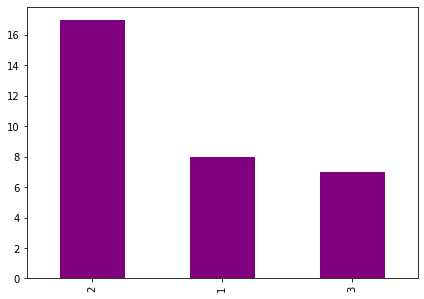

In [12]:
df1['trav_per_year'].value_counts().plot(kind = 'bar',
                                        figsize=(7,5),
                                        color = 'purple');

# What type of lodging do you most often stay at?
<hr/>

In [13]:
# in %

df1['type_lodging'].value_counts(normalize = True) * 100 

Hotel                           50.000
AirBnb                          34.375
Family                           6.250
Whatever is cheapest             3.125
Hotel and local inn              3.125
Split between Hotels and Air     3.125
Name: type_lodging, dtype: float64

# Who do you usually travel with?
<hr>

In [14]:

df1['who_travel'].value_counts()

With friends, With family                          8
With family                                        8
With friends                                       4
By myself                                          3
By myself, With friends, With family               3
By myself, With family                             2
With friends, With family, with S.O.               1
By myself, With friends                            1
with partner                                       1
By myself, With friends, With family, With kids    1
Name: who_travel, dtype: int64

# How many people do you travel with?
<hr/>

In [15]:
df1['num_people'].value_counts()

1-2 people    18
3-4 people    12
5+ people      1
None           1
Name: num_people, dtype: int64

# Do you prefer to use an app or website when booking your travel accommodations?
<hr/>

In [16]:
# in %

df1['app_website'].value_counts(normalize = True)*100

Website    78.125
App        21.875
Name: app_website, dtype: float64

# Have you travelled during the pandemic?
<hr>

In [17]:
# in %

df1['covid_travel'].value_counts(normalize = True)* 100

Yes    59.375
No     40.625
Name: covid_travel, dtype: float64

# If YES,  what type of lodging did you stay at and why?
<hr/>

In [18]:
df1['covid_lodging']

0                                   Hotel for ease/safe
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5     Hotel.  Normally would've stayed with family, ...
6                                                   NaN
7                                        Hotel, Airbnb 
8     Air bnb, they had good cleaning procedures tha...
9     Friend's home, most accessible and least likel...
10    AirBnB cabin with a hot tub. We wanted to get ...
11                           Stayed at a friends house.
12                           Condo rental /rental home 
13    Air bnb, easier to find for more remote locati...
14    Campgrounds, Airs, Hotels - As many campground...
15                                                  NaN
16                                        Family House 
17                                              

# If YES,  did you have any concerns or difficulties during your stay in relation to COVID? 
<hr/>

In [19]:
df1['covid_issues']

0                                                    No
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5     Yes, staffing levels were reduced, which resul...
6                                                   NaN
7             Less amenities, smaller breakfast options
8     A lot of restaurants and places were closed in...
9                                                    No
10                                                   No
11    I travelled through multiple states and it was...
12                           Pool usage at rented condo
13    When new travel restrictions were implemented ...
14    No. Places were were empty and just like anywh...
15                                                  NaN
16                         Some just social distancing 
17                                              

# Why do you typically choose that lodging option?
<hr/>

In [20]:
df1['why_lodging']

0                       Experience. Know what to expect
1                     Free parking, breakfast included 
2     Easiest option to book without research, can u...
3     location, proximity to places of interest, ame...
4                                          Convenience 
5                           Consistent quality/features
6     Big hotel chains are easy to find and expense ...
7           Not sketchy, rewards points, free breakfast
8                It’s cheaper and there’s more options 
9                                      Feels more homey
10           It's cheaper and offers more than a hotel.
11                      Room rates and rewards program.
12    I can find  exactly (or close) to what I want ...
13    Easy to book, lots of options, usually closest...
14    Hotel: Shorter trip --- Air: Longer trip or mo...
15                    I try not to spend too much money
16    More personal and more involved in wherever I am!
17                                   It is inexp

# "Bed and Breakfast", what comes to mind
<hr/>

In [21]:
df1['term_bnb'].unique()

array(['Charming vacation ', 'Tea and bread',
       'Motel, AirBnb, cozy lodging in countryside',
       'inexpensive lodging, comfort of home away from home', 'Homey',
       'Quaint vacation lodging', 'Small family-owned vacation home',
       'Small, quaint hotel with breakfast ', 'A hotel', 'Cabin',
       'AirBnB',
       'Overnight accommodations which includes breakfast the next morning.',
       'Cute little place, family friendly, couples, good breakfast, hospitality ',
       'Relaxing amenities, cooked meals, quiet getaway',
       'Everything AirBnB - Also corny country inns - Couples weekends',
       'A small inn, locally owned. Definitely not a large chain like Hampton. ',
       'A hotel ',
       'Comfortable lodging with food and amenities. Low cost for nightly stays. ',
       'Vermont and fall',
       'Traditional, colonial style housing, affordable, low-end amenities focus on lodging',
       'travel',
       'Place to stay overnight that is quaint and has breakf

In [22]:
# lemitize 


In [23]:
# word count 

In [24]:
# Emotinal inflextion 

In [25]:
####

# How do you typically find places to stay at while traveling? (rank from 1-4)
<hr/>

In [34]:
findplaces_df =  prepare_table(df1, ['find_recommendations','find_social','find_google','find_online']).reset_index()
findplaces_df

,index,1,2,3,4
0,find_recommendations,28.0,28.0,28.0,16.0
1,find_social,44.0,41.0,9.0,6.0
2,find_google,NaN,12.0,31.0,56.0
3,find_online,16.0,9.0,19.0,56.0


In [38]:
%%R -i findplaces_df -w 10 -h 5 -u in -r 400

# replacing '.' in colnames by spaces which were lost in the 
# transition from Python to R

install.packages("HH", repos='https://CRAN.R-project.org/package=HH', quiet=TRUE)
library(HH)


colnames(findplaces_df) <- gsub('\\.', ' ', colnames(findplaces_df))
likert(index ~ ., data=findplaces_df,
       main="Machiavellianism",
       ylab=NULL,
       scales=list(y=list(relation="free")), layout=c(1,1),
       positive.order=T)

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://CRAN.R-project.org/package=HH/src/contrib:
  cannot open URL 'https://CRAN.R-project.org/package=HH/src/contrib/PACKAGES'

R[write to console]: Error in library(HH) : there is no package called ‘HH’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package ‘HH’ is not available (for R version 3.6.1) 




Error in library(HH) : there is no package called ‘HH’


In [28]:
"""
likert(category ~ . | question, 
       subset(quest, subtable=='age'),
       main='Machiavellianism',
       ylab='Age categories',
       as.percent=T,
       layout=c(1,5))


likert(question ~ . | category, 
       subset(quest, subtable=='gender'),
       main='Machiavellianism',
       ylab=NULL,
       as.percent=T,
       rightAxis=F,
       positive.order = T)

"""

"\nlikert(category ~ . | question, \n       subset(quest, subtable=='age'),\n       main='Machiavellianism',\n       ylab='Age categories',\n       as.percent=T,\n       layout=c(1,5))\n\n\nlikert(question ~ . | category, \n       subset(quest, subtable=='gender'),\n       main='Machiavellianism',\n       ylab=NULL,\n       as.percent=T,\n       rightAxis=F,\n       positive.order = T)\n\n"

# When you book a vacation, what matters to you? (rank from 1-6)
<hr/>

In [29]:
prepare_table(df1, ['matters_tours','matters_food','matters_relax',
                    'matters_shopping','matters_meeting', 'matters_immersing']).T

,matters_tours,matters_food,matters_relax,matters_shopping,matters_meeting,matters_immersing
1,22.0,NaN,3.0,31.0,34.0,3.0
2,12.0,6.0,12.0,31.0,28.0,9.0
3,12.0,19.0,22.0,16.0,16.0,9.0
4,19.0,22.0,12.0,6.0,6.0,9.0
5,6.0,19.0,25.0,9.0,6.0,19.0
6,28.0,34.0,25.0,6.0,9.0,50.0
